# Google play Store Analysis  
Janiel - Maio 2024


----------

### Import Library

In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore") # Ignorando as saídas com avisos

# Manipule Data
import pandas as pd
import numpy as np

# Vizualise data 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# view settings
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 5)

## 1. Data Selection

### 1.1 Load DataSet

In [2]:
store_df = pd.read_csv('./Base_de_dados/googleplaystore.csv')

### 1.2 Overview

In [3]:
store_df.head()
# store_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
store_df.shape

(10841, 13)

In [5]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### 💡 Insights

Note que teremos uma série de desafios 🧐

1. Algumas colunas possuem dados com escalas diferentes ( Na coluna "Size", por exemplo, temos valores em Mega/Kilo)
2. Muitos dados estão com a formatação errada
3. Temos alguns valores nulos
4. Praticamente todos os dados estão com o tipo objeto
<hr>

## 2. Pré-processing

Devido a quantidade de anomalias que vimos na etapa anterior, me parece uma boa ideia irmos com Calma 😅

### 2.1.1 Reviews column

In [6]:
# Identificando se todas os dados da Coluna "Reviews" são numéricos
store_df[~store_df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Pelo formato dos dados na coluna, podemos entender que houve um erro no preenchimento.
Como trata-se apenas de uma linha, vamos excluí-la.

In [7]:
# Removendo a linha
store_df.drop(index=10472, axis=0,inplace=True)

In [8]:
# Alterando o tipo de dados
store_df['Reviews'] = store_df['Reviews'].astype('int')

In [9]:
store_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<hr>

### 2.1.2 Size Column

In [10]:
store_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

#### Discussão 🧐

1. Temos muitos em "K" e "M", vamos converter todos para a mesma unidade 
2. Alguns números em Mega são decimais, devemos ter um cuidado maior por conta deles
3. As células com valor 'Varies with device' serão convertidas para "nan", depois veremos o que fazer.

In [11]:
# Organizando Valores
store_df['Size'] = store_df['Size'].str.replace('M','000')
store_df['Size'] = store_df['Size'].str.replace('k','')
store_df['Size'] = store_df['Size'].replace('Varies with device',np.nan)

In [12]:
store_df['Size'] = store_df['Size'].astype('float')

In [13]:
store_df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [14]:
# Resolvendo o problema dos números que estavam em casa decimais 
for i in store_df['Size']:
    if i < 10:
        store_df['Size'] = store_df['Size'].replace(i,i*1000)

store_df['Size'] = store_df['Size']/1000

In [15]:
store_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<hr>

### 2.1.3 Installs e Price columns

In [16]:
store_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
store_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [18]:
# Organizando os valores
itens_mude = ['$',',','+']
columns = ['Price', 'Installs']

for item in itens_mude:
    for col in columns:
        store_df[col] = store_df[col].str.replace(item,'')

store_df['Installs'] = store_df['Installs'].astype('int64')
store_df['Price'] = store_df['Price'].astype('float')

In [19]:
store_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<hr>

### 2.1.4 Last Updated column

In [20]:
store_df['Last Updated'] = pd.to_datetime(store_df['Last Updated'])

In [21]:
store_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

<hr>

## 2.2 Data Cleaning



### 2.2.1 Missing values

In [22]:
# Checando os valores vazios 
def missing_data(dataFrame):
    '''Essa função retorna a quantidade de valores vazios no dataframe'''
    Total = dataFrame.isnull().sum().sort_values(ascending=False)
    Percent = ((dataFrame.isnull().sum()/dataFrame.shape[0])*100).sort_values(ascending=False)
    
    return pd.concat([Total,Percent],axis=1, keys=['Total','Percent'])

missing_data(store_df)

,Total,Percent
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


#### 🧹Lidando com valores ausentes

**Colunas numéricas com valores ausentes:** Dependendo da natureza dos dados, podemos preencher com a média, mediana ou moda.

**Colunas categóricas:** Como o numero de valores é muito pequineo, preencheremos com a moda.

In [23]:
def view_distribution(DataSet, column):
    fig, ax =plt.subplots(1,2, figsize=(16,5))
    sns.histplot(DataSet, x=column,kde=True,ax=ax[0])
    ax[0].axvline(DataSet[column].mean(), color='red',linestyle='dashed', linewidth=1, label='Média')
    ax[0].axvline(DataSet[column].median(), color='blue',linestyle='dashed', linewidth=1, label='Mediana')
    
    ax[0].legend()
    sns.boxplot(DataSet,x=column,ax=ax[1])
    
    plt.show()



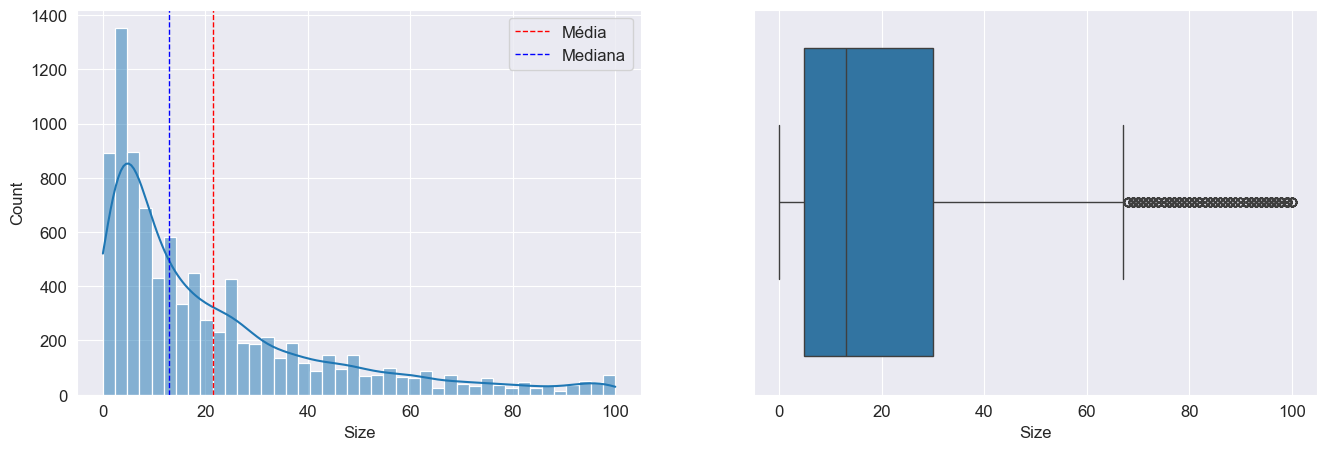

In [24]:
# Analizando a distribuição da coluna Size
view_distribution(store_df, 'Size')

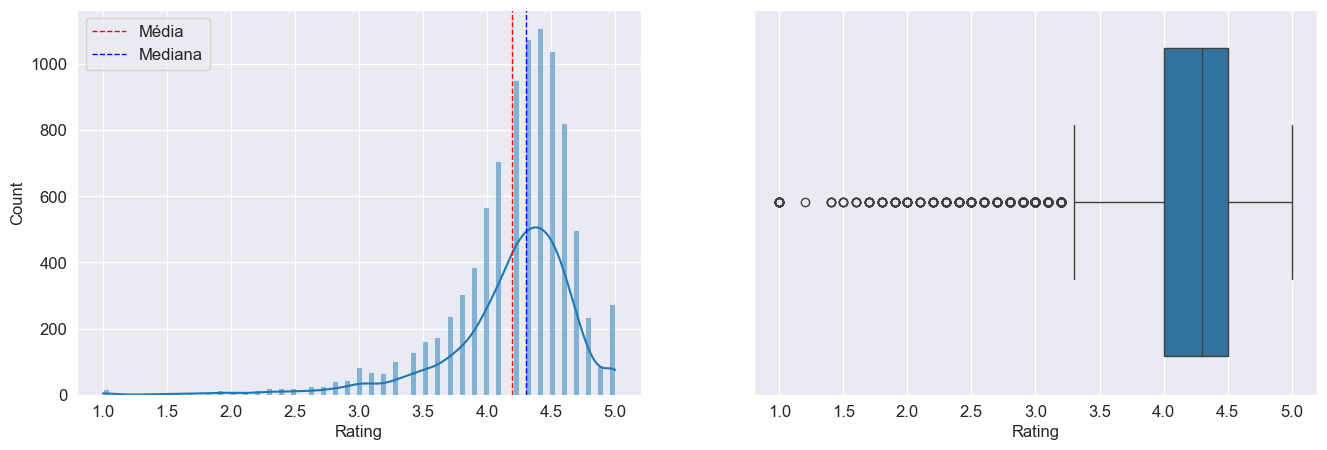

In [25]:
# Analisando a distribuição da coluna Rating
view_distribution(store_df, 'Rating')

In [26]:
# Analise geral das estatísticas
store_df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840
mean,4.191757,4.441529e+05,21.506534,1.546434e+07,1.027368,2017-11-21 06:43:02.435424256
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000,2017-09-20 00:00:00
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000,2018-05-24 00:00:00
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000,2018-07-20 00:00:00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.515219,2.927761e+06,22.596021,8.502936e+07,15.949703,NaN


### 💡 Insight
**Rating:** Possui um comportamente bem parecido com a distribuição normal, porem muito deslocada a direita, o que diz que o maior número de avaliações foram boas.<br>
**Reviews e Installs:** possuem um grande número de variação, isso significa que vamos precisar ter cuidado mais adiante para não fazer conclusões precipitadas.<br>
**Size:** Perceba que a curva está muito deslocada para a esquerda e possui outliers. Isso significa que alguns aplicativos tem um tamanho muito fora do padrão e,portanto,nossa média está comprometida.<br>
**Price:** Podemos afirmar que pelo menos 75% dos Apps são gratuítos.

### Tratamento dos valores vazios
> Primeiro, é importante ressaltar que os Outliers não são necessariamente erros ou equívocos. Eles poderiam representar valores extremos genuínos, pois estão dentro de uma faixa que faz sentido para ambas as variáveis.

**Rating:** Substituiremos pela média<br>
**Size:** Substituiremos pela mediana

In [27]:
# Substituindo os valores vazios
store_df['Rating'] = store_df['Rating'].fillna(store_df['Rating'].mean())
store_df['Size'] = store_df['Size'].fillna(store_df['Size'].median())
store_df['Current Ver'] = store_df['Current Ver'].fillna(store_df['Current Ver'].mode().iloc[0])
store_df['Android Ver'] = store_df['Android Ver'].fillna(store_df['Android Ver'].mode().iloc[0])
store_df['Type'] = store_df['Type'].fillna(store_df['Type'].mode().iloc[0])


missing_data(store_df)

,Total,Percent
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


<hr>

### 2.2.2 Duplicated Values

In [28]:
store_df.duplicated().sum()

np.int64(483)

In [29]:
store_df[store_df.duplicated()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,13.0,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,13.0,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,13.0,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,13.0,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up


In [30]:
store_df.drop_duplicates(inplace=True)
store_df.duplicated().sum()

np.int64(0)


<hr>
Ufa 🤭.<br>
Agora que nossos dados estão prontos para serem analisados, vamos entende um pouco do comportamento dos consumidores. 😃
<br>
<br>

### 3. Data Mining

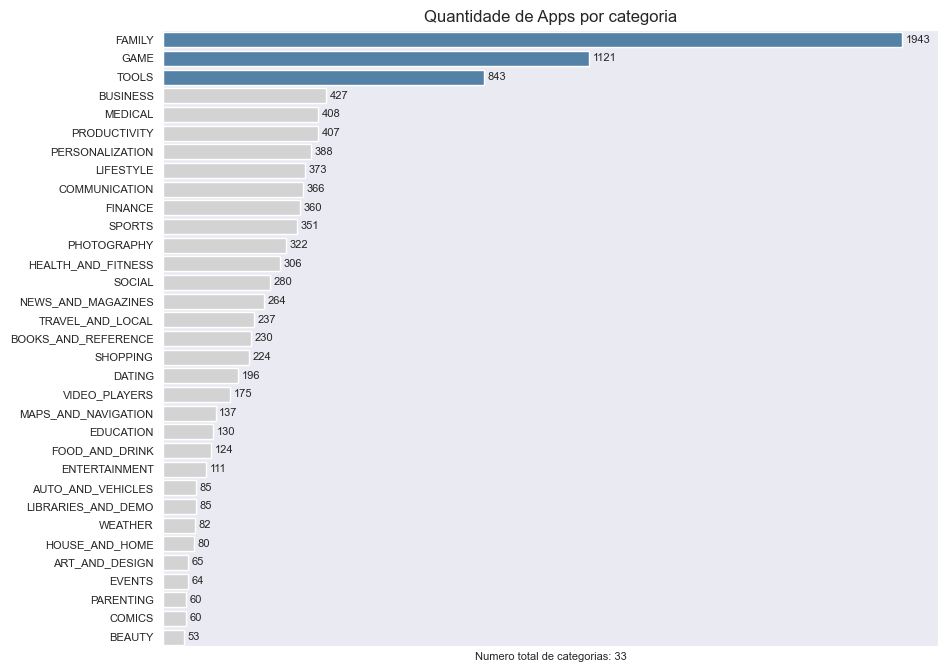

In [50]:
category = store_df["Category"].value_counts()

# Configurando a distribuição das cores 
top3_cat = category.index[:3]
colors = ['steelblue' if cat in top3_cat else 'lightgray' for cat in category.index]

# Plotando o gráfico 
plt.figure(figsize=(10,8))
sns.barplot(y=category.index,x=category.values, orient='h', palette=colors)

# Inserindo os valores de X na frente da barra
for index, value in enumerate(category.values):
    plt.text(value + 10, index, str(value), fontsize=8, va='center')


plt.title('Quantidade de Apps por categoria', size=12)
plt.ylabel('')
plt.xlabel(f'Numero total de categorias: {store_df["Category"].nunique()}', size=8)
plt.yticks(fontsize=8)
plt.xticks([])

plt.show()

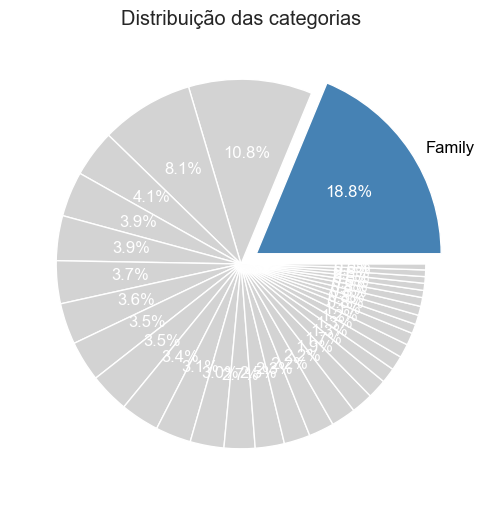

In [32]:
labels = category.index.to_list()

# Configurando a distribuição das cores
colors = ['steelblue' if label == 'FAMILY' else 'lightgray' for label in labels]

# Plotando o Gráfico
plt.figure(figsize=(15,6))
explode = [0.1 if label == 'FAMILY' else 0 for label in labels]
plt.pie(x=category.values,autopct='%.1f%%', explode=explode, colors=colors, textprops={'size': 12, 'color': 'white'})

# Ajuste fino
plt.text(1, 0.6, 'Family', fontsize=12, color='black')
plt.title('Distribuição das categorias')

plt.show()

#### 💡 Insight
Podemos ver claramente que apenas 3 categorias se destacam fortemente no que diz respeito a quantidade de Apps, sendo que a maior delas contem 18,8% de todos eles.

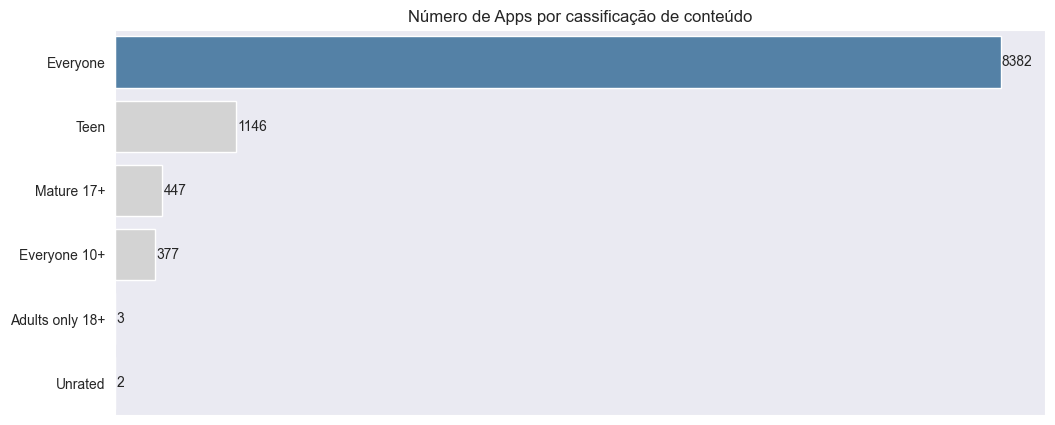

In [33]:
content = store_df['Content Rating'].value_counts()

# Configurando a distribuição de cores
top1_cat = category.index[:1]
colors = ['steelblue' if cat in top1_cat else 'lightgray' for cat in category.index]


# Plotando o gráfico 
plt.figure(figsize=(12,5))
sns.barplot(y=content.index,x=content.values, orient='h', palette=colors)


# Ajustes finos
for index, value in enumerate(content.values):
    plt.text(value +10, index, str(value), fontsize=10, va='center')

plt.title('Número de Apps por cassificação de conteúdo', size=12)
plt.ylabel('')
plt.yticks(fontsize=10)
plt.xticks([])

plt.show()

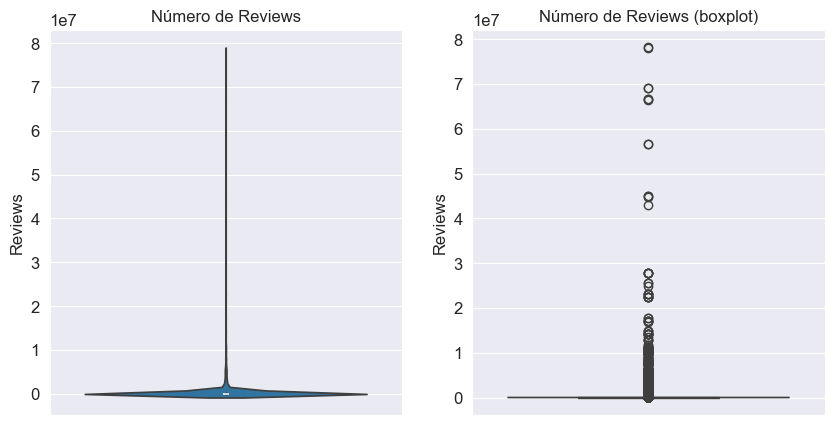

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.violinplot(store_df, y='Reviews', ax=ax[0])
ax[0].set_title('Número de Reviews', size=12)

sns.boxplot(store_df, y='Reviews',ax=ax[1])
ax[1].set_title('Número de Reviews (boxplot)', size=12)

plt.show()

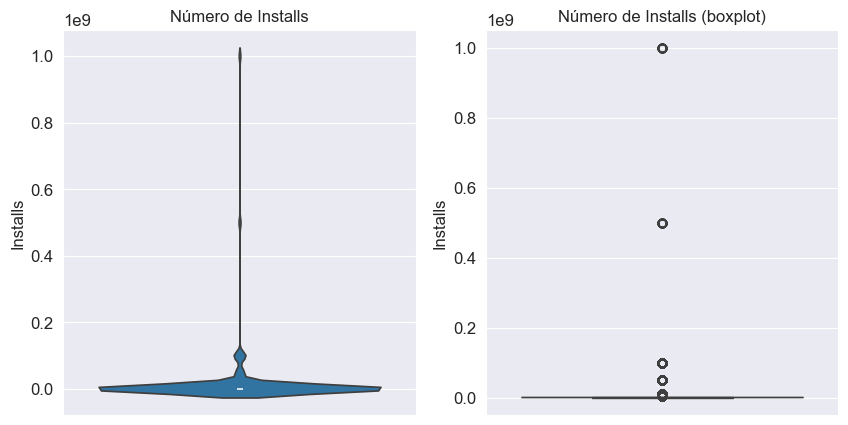

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.violinplot(store_df, y='Installs', ax=ax[0])
ax[0].set_title('Número de Installs', size=12)

sns.boxplot(store_df, y='Installs',ax=ax[1])
ax[1].set_title('Número de Installs (boxplot)', size=12)

plt.show()

#### 💡 Insight

Observe que tanto o número de intalações quanto e de avaliações tem comportamentos semelhantes: Ambas possuem valores significativamente discrepantes.

⚠ Qualquer análise que busque responder perguntas como "Qual a categoria de Apps com melhores avaliações" deve se preoculpar fortemente com esse aspécto.

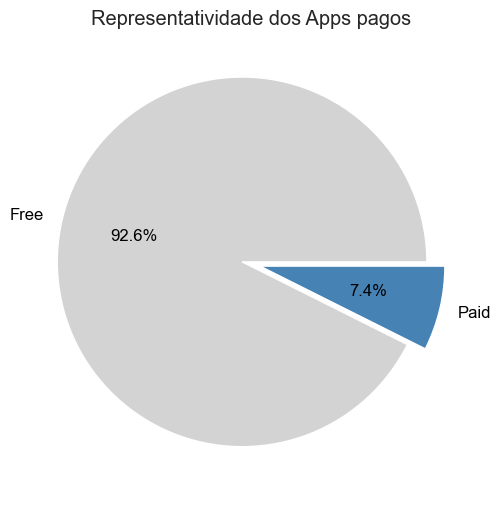

In [36]:
buy = store_df['Type'].value_counts()
labels = buy.index.to_list()

# Configurando a distribuição das cores
colors = ['steelblue' if label == 'Paid' else 'lightgray' for label in labels]

# Plotando o Gráfico
plt.figure(figsize=(15,6))
explode = [0.05, 0.05]
plt.pie(x=buy.values,autopct='%.1f%%',labels=labels,colors=colors,explode=explode, textprops={'size': 12, 'color': 'black'})
plt.title('Representatividade dos Apps pagos')

plt.show()

#### 💡 Insight

Como o número de Apps pagos é bastante inferior aos gratuitos, dividiremos a dataSet para analisar algumas diferença entre o comportamento do usuário nesses dois cenários.

In [37]:
paid_df = store_df[store_df['Type'] == 'Paid']
free_df = store_df[store_df['Type'] == 'Free']

In [38]:
# Analisando o impacto da versão do Android
a = paid_df['Android Ver'].value_counts()[:10]
b = free_df['Android Ver'].value_counts()[:10]
android = pd.concat([a, b], axis=1, keys=['Paid', 'Free'])
android

,Paid,Free
Android Ver,,
4.1 and up,126.0,2255.0
4.0 and up,96.0,1241.0
4.0.3 and up,83.0,1368.0
2.3 and up,70.0,573.0
Varies with device,64.0,1157.0
2.2 and up,46.0,NaN
4.4 and up,40.0,854.0
1.6 and up,39.0,NaN
3.0 and up,31.0,NaN


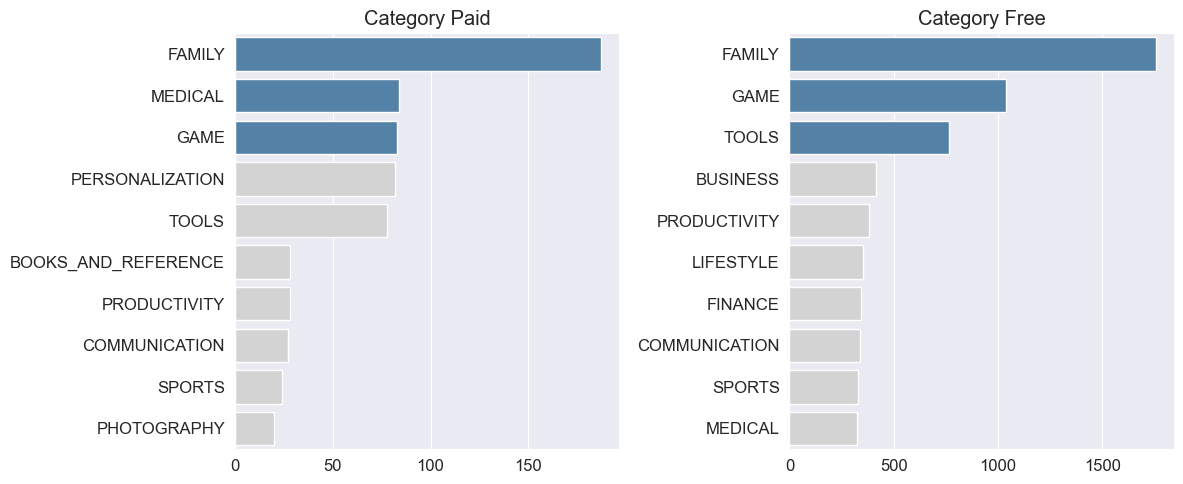

In [39]:
cat_paid = paid_df['Category'].value_counts()[:10]
cat_free = free_df['Category'].value_counts()[:10]

# Configurando a distribuição de cores
top3_paid = cat_paid.index[:3]
top3_free = cat_free.index[:3]

color_paid = ['steelblue' if cat in top3_paid else 'lightgray' for cat in cat_paid.index]
color_free = ['steelblue' if cat in top3_free else 'lightgray' for cat in cat_free.index]


# Plotando o gráfico 
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.barplot(y=cat_paid.index,x=cat_paid.values, orient='h', palette=color_paid, ax=ax[0])
ax[0].set(ylabel='', title='Category Paid')

sns.barplot(y=cat_free.index,x=cat_free.values, orient='h', palette=color_free, ax=ax[1])
ax[1].set(ylabel='', title='Category Free')

plt.tight_layout()

plt.show()


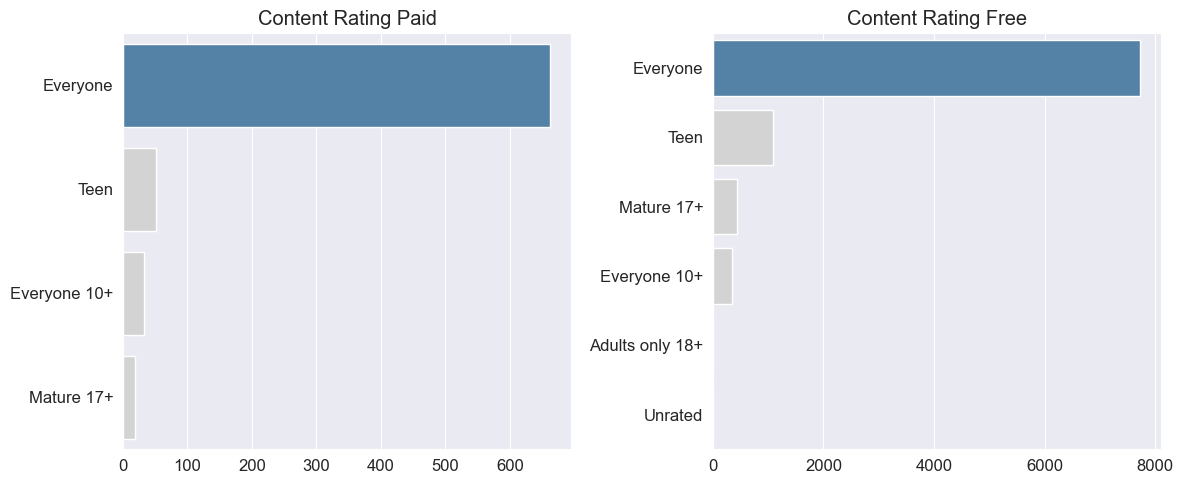

In [40]:
cont_paid = paid_df['Content Rating'].value_counts()
cont_free = free_df['Content Rating'].value_counts()

# Configurando a distribuição de cores
top3_paid = cont_paid.index[:1]
top3_free = cont_free.index[:1]

color_paid = ['steelblue' if cat in top3_paid else 'lightgray' for cat in cont_paid.index]
color_free = ['steelblue' if cat in top3_free else 'lightgray' for cat in cont_free.index]


# Plotando o gráfico 
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.barplot(y=cont_paid.index,x=cont_paid.values, orient='h', palette=color_paid, ax=ax[0])
ax[0].set(ylabel='', title='Content Rating Paid')

sns.barplot(y=cont_free.index,x=cont_free.values, orient='h', palette=color_free, ax=ax[1])
ax[1].set(ylabel='', title='Content Rating Free')

plt.tight_layout()

plt.show()

#### Análise direta entre Apps Pagos e Gratuítos

In [41]:
def plots(feacture, catplot=True):
    """Essa função plota gráficos kde e catplot utilizando o FacetGrid"""
    g = sns.FacetGrid(store_df, hue="Type", aspect=2)
    g.map(sns.kdeplot, feacture)
    g.add_legend()
    
    if catplot:
        sns.catplot(y=feacture,x='Type',data = store_df,kind='boxen')
    
    plt.show()

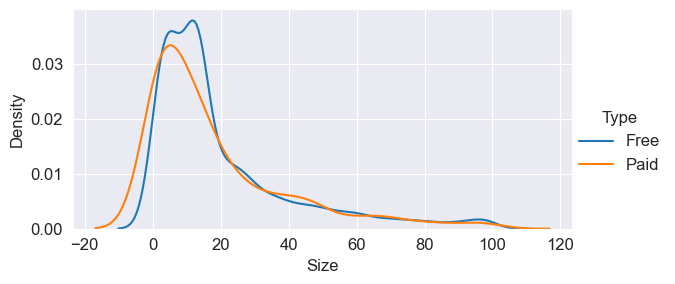

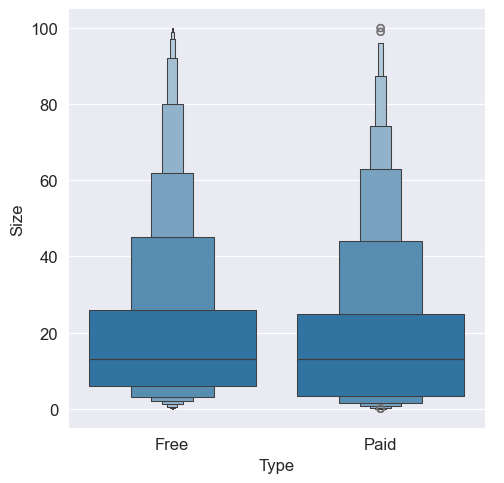

In [42]:
# Analisando o comportamento dos dados no que diz respeito ao Size
plots('Size')

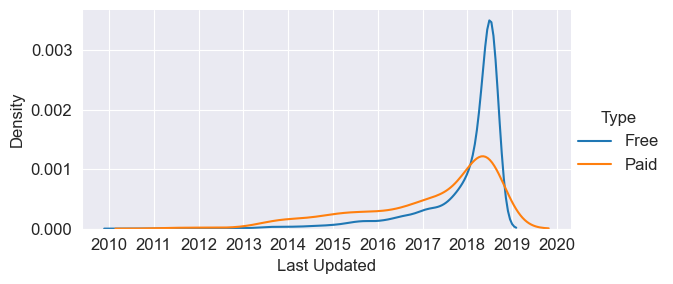

In [43]:
# Analizando o histórico de atualizações
plots('Last Updated', catplot=False)

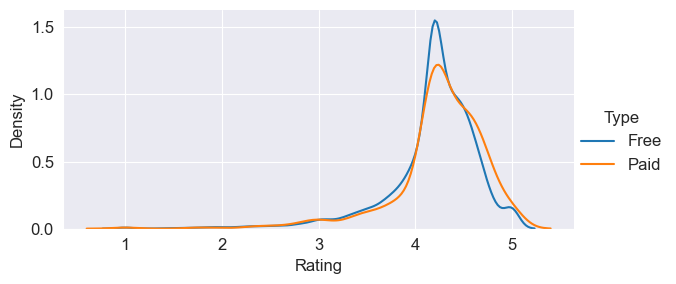

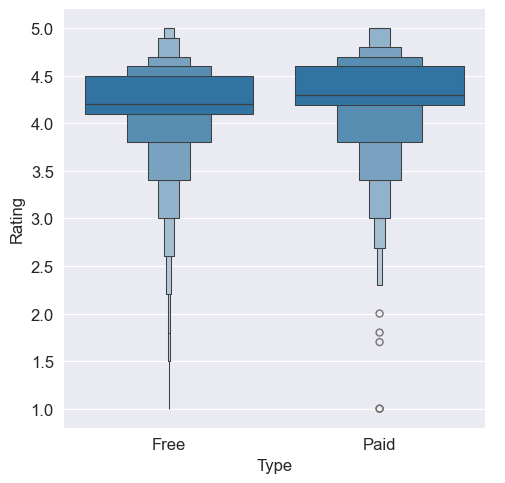

In [44]:
# Analisando o comportamento dos dados no que diz respeito ao Rating
plots('Rating')

<hr>

## 4. Pattern Evaluation

> Com essa analise, podemos retirar alguns insights relevantes para alguem que busca entender o funcionamento da plataforma.

1. O maior número de Apps disponíveis são classificados como 'Family' e possuem conteúdos apropriados para todos os públicos.
2. Apenas 7,4% dos Apps disponíveis na plataforma são pagos
3. Os Apps pagos são consideravelmente mais conservadores no que diz respeito atualizações.
4. A maior parte dos usuários que consomem Apps gratuitos ou pagos possuem android 4.1 ou superior.
5. Respeitando o proporção entre os diferentes tipos, os classificados como 'Medical' se destaca pela quantidade de Apps pagos.
6. A qualidade da avaliação é muito parecida entre aplicativos pagos e gratúitos, sendo o primeiro razoavelmente melhores.